In [244]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

In [245]:
data = pd.read_csv('../best-artworks-dataset/artists.csv',encoding='utf-8')
data.sample(5)

,id,name,years,genre,nationality,bio,wikipedia,paintings
33,33,Henri de Toulouse-Lautrec,1864 - 1901,Post-Impressionism,French,Henri Marie Raymond de Toulouse-Lautrec-Monfa ...,https://en.wikipedia.org/wiki/Henri_de_Toulous...,81
10,10,Hieronymus Bosch,1450 - 1516,Northern Renaissance,Dutch,Hieronymus Bosch (c. 1450 - 9 August 1516) was...,http://en.wikipedia.org/wiki/Hieronymus_Bosch,137
29,29,Jan van Eyck,1395 - 1441,Northern Renaissance,Flemish,Jan van Eyck (c. before 1390 - 9 July 1441) wa...,http://en.wikipedia.org/wiki/Jan_van_Eyck,81
18,18,El Greco,1541 - 1614,Mannerism,"Spanish,Greek",Domenikos Theotokopoulos (1 October 1541 - 7 A...,http://en.wikipedia.org/wiki/El_Greco,87
40,40,Henri Rousseau,1844 - 1910,Primitivism,French,Henri Julien Felix Rousseau (21 May 1844 - 2 S...,https://en.wikipedia.org/wiki/Henri_Rousseau,70


In [246]:
data_year = pd.DataFrame(data.years.str.split(' - ').tolist(),columns = ['birth', 'death'])
data["birth"] = data_year.birth.apply(lambda x: int(x))
data["death"] = data_year.death.apply(lambda x: int(x))
data["age"] = data.death - data.birth
data.drop(["id", "years", "bio", "wikipedia"], axis=1, inplace=True)

data.sample(5)

,name,genre,nationality,paintings,birth,death,age
3,Claude Monet,Impressionism,French,73,1840,1926,86
11,Kazimir Malevich,Suprematism,Russian,126,1879,1935,56
38,Paul Cezanne,Post-Impressionism,French,47,1839,1906,67
19,Albrecht Durer,Northern Renaissance,German,328,1471,1528,57
8,Vincent van Gogh,Post-Impressionism,Dutch,877,1853,1890,37


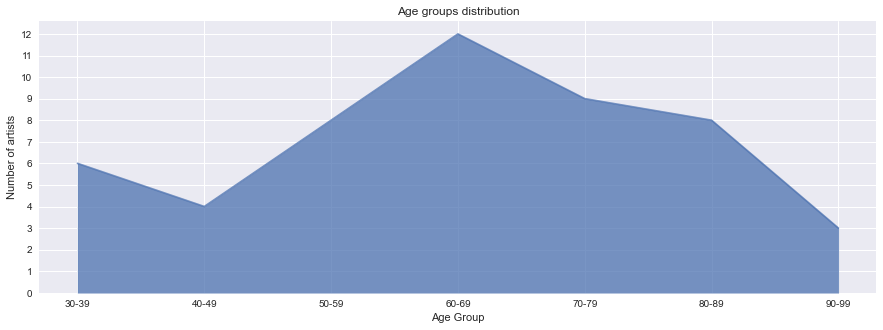

In [247]:
# add age_group column
bins=[30,39,49,59,69,79,89,99]
labels=["30-39","40-49","50-59","60-69","70-79","80-89","90-99"]
data['age_group'] = pd.cut(data['age'],bins=bins,labels=labels)

df = data.groupby(["age_group"]).size()

# plot area
plt.figure(figsize=(15,5))
plt.style.use('seaborn')
df.plot.area(alpha=.75)

plt.gca().yaxis.set_major_locator(plt.MultipleLocator(1))
plt.xlabel("Age Group")
plt.ylabel("Number of artists")
plt.title("Age groups distribution")
plt.show()

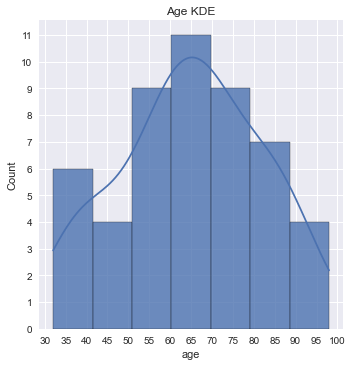

In [248]:
sea.displot(data['age'], kde=True, alpha=.8)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(5))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(1))
plt.title("Age KDE")
plt.show()

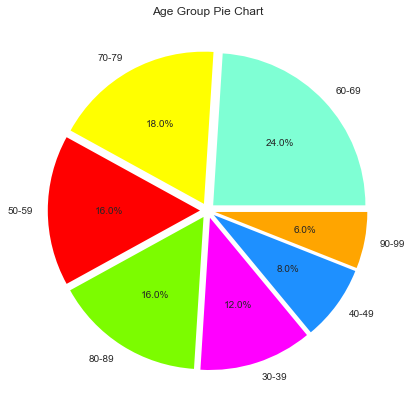

In [249]:
ag_labels = data['age_group'].value_counts().index
ag_values = data['age_group'].value_counts().values
colors = ['aquamarine', 'yellow', 'red', 'lawngreen', 'magenta', 'dodgerblue', 'orange']
explode = [.05] * len(ag_values)


#visualization
plt.figure(figsize=(7,7))
plt.pie(x=ag_values, labels=ag_labels, colors=colors, explode=explode, autopct='%1.1f%%')
plt.title('Age Group Pie Chart')
plt.show()

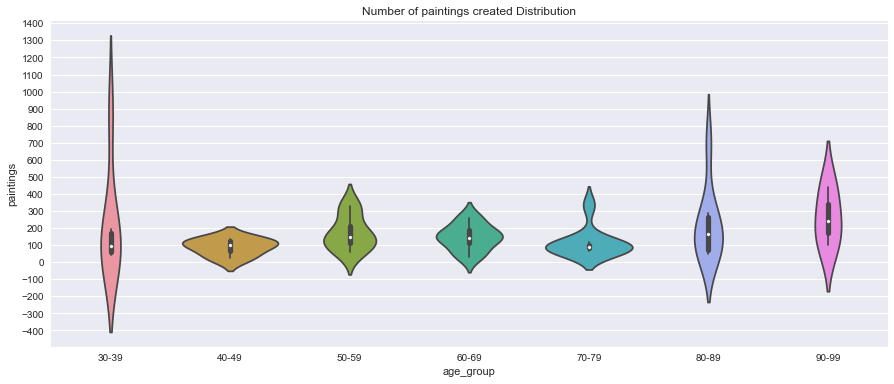

In [250]:
plt.figure(figsize=(15,6))
sea.violinplot(x=data['age_group'], y=data['paintings'])

plt.gca().yaxis.set_major_locator(plt.MultipleLocator(100))
plt.title('Number of paintings created Distribution')
plt.show()

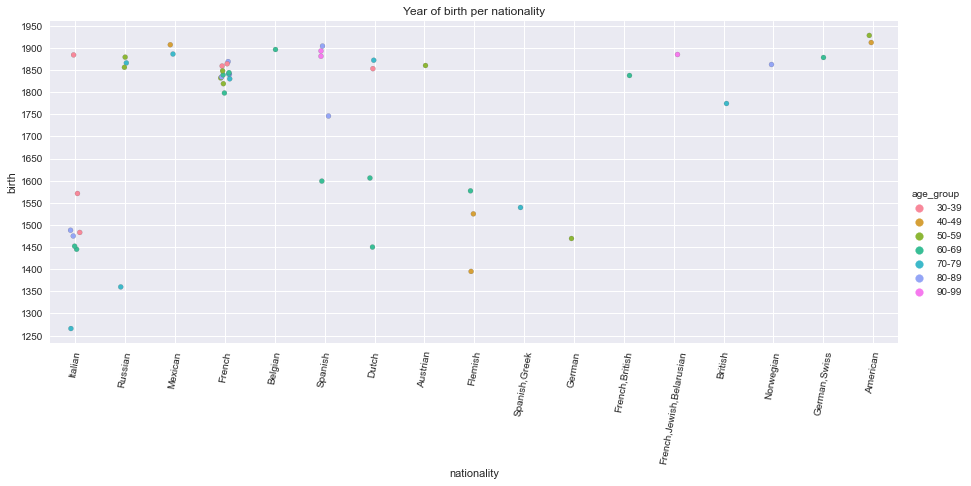

In [251]:
sea.catplot(x="nationality", y="birth", hue="age_group", data=data, linewidth=.15, aspect=5/2)
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(50))
plt.gca().xaxis.grid(which='major')
plt.xticks(rotation=80)
plt.title("Year of birth per nationality")
plt.show()

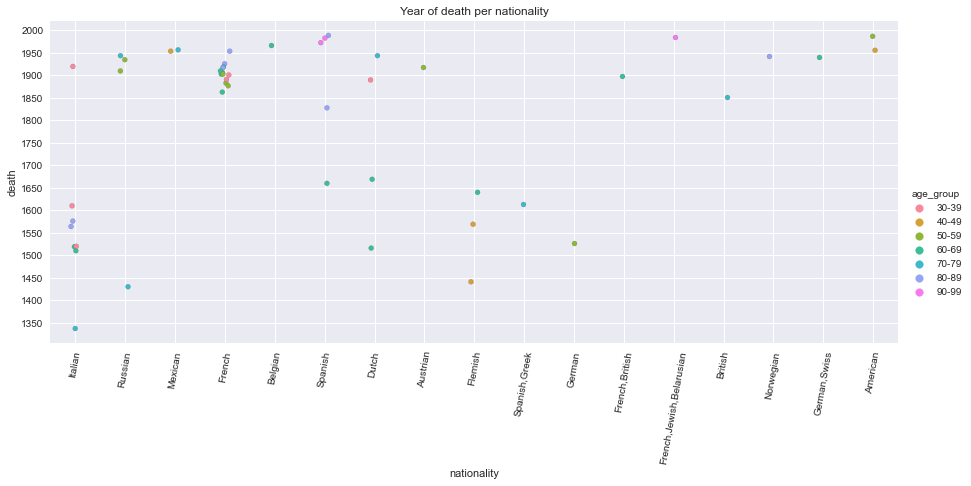

In [252]:
sea.catplot(x="nationality", y="death", hue="age_group", data=data, linewidth=.15, aspect=5/2)
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(50))
plt.gca().xaxis.grid(which='major')
plt.xticks(rotation=80)
plt.title("Year of death per nationality")
plt.show()

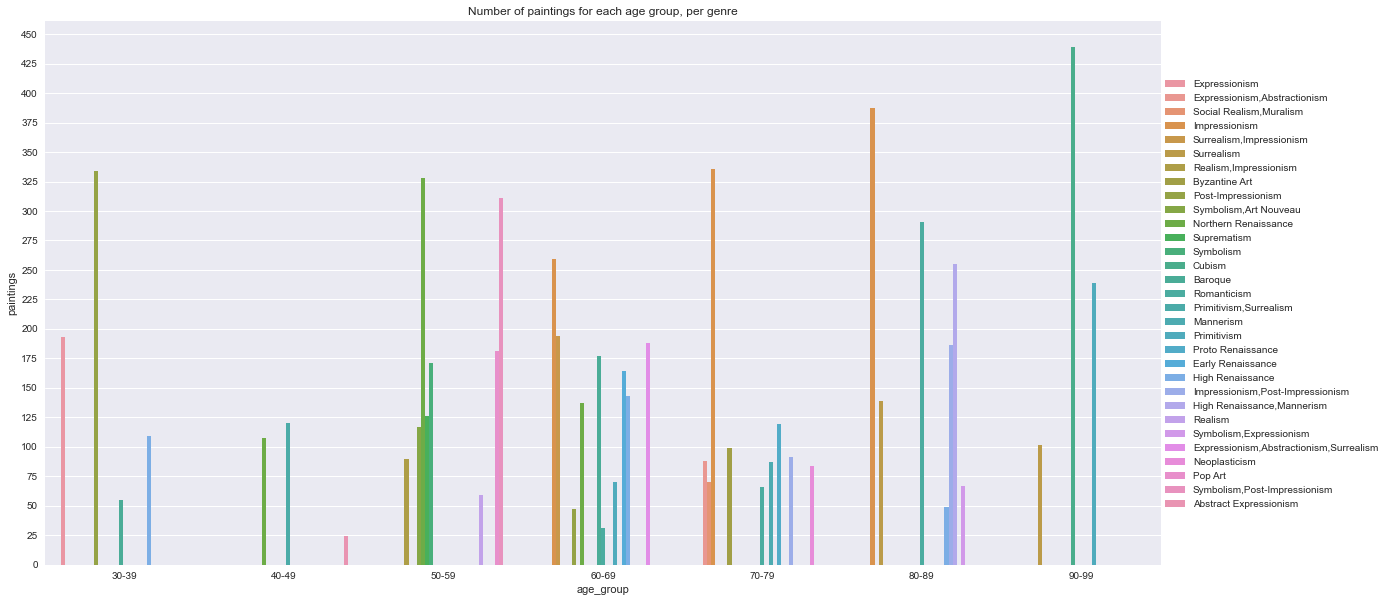

In [253]:
plt.figure(figsize=(20,10))
sea.barplot(x = "age_group", y = "paintings", hue = "genre", data = data, ci=None)

plt.gca().yaxis.set_major_locator(plt.MultipleLocator(25))
plt.title("Number of paintings for each age group, per genre")
plt.legend(bbox_to_anchor=(1, 0.9), loc='upper left', borderaxespad=0.)
plt.show()